In [1]:
# Useful starting lines
%matplotlib inline
import numpy as np
%load_ext autoreload
%autoreload 2

#plot library
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from helpers import *
from cross_val import *
from preprocessing import *
from plot import *

from run import *

# Model selection with jet separation

In [3]:
DEBUG = False

In [4]:
PATH_TRAIN= '../data/train.csv'
PATH_TEST = '../data/test.csv'
y, tX, ids = load_csv_data(PATH_TRAIN, sub_sample=DEBUG)
y_test, tX_test, ids_test = load_csv_data(PATH_TEST, sub_sample=DEBUG)
features_name = np.genfromtxt('../data/train.csv', delimiter=",", dtype=str,max_rows=1)[2:]

In [5]:
preprocessed_X,preprocessed_X_test, preprocessed_y, masks_test = preprocess_data_new(tX, tX_test,y)

Feature number 9 is removed
Feature number 9 is removed


In [7]:
#Fixed Parameters 
seed = 1
k_fold = 5

## Keeping only
- Least squares
- Ridge regression

In [8]:
def make_analysis_per_group(x, y):
    print('Least squares')
    method = least_squares
    degree = np.arange(6,10)
    fourier = 0

    print('Test the high degrees')
    parameters_LS = []
    for d in degree:
        parameters_LS.append({'degree':d,'fourier':fourier})
        
    print_param_test(parameters_LS)

    acc_tr_deg, acc_te_deg, std_tr_deg, std_te_deg,idx_best = cross_tunning(y, x,
                                            k_fold=k_fold, method=method , parameters=parameters_LS, seed=seed)
    
    cross_validation_visualization(degree, acc_tr_deg, acc_te_deg, 'degree')
    plt.show()
    print('Best parameters\n', parameters_LS[idx_best[0]], '\n')

    accuracy_LS = acc_te_deg[idx_best[0]]
    print('\033[1m' +'--> Test Accuracy for the best parameter : '+'\033[0m', accuracy_LS)

    print('\nTest the fourier expansion')

    degree = degree[idx_best[0]]
    fourier = np.arange(1, 7)
    parameters_LS = []
    for f in fourier:
        parameters_LS.append({'degree':degree,'fourier':f})

    print_param_test(parameters_LS)

    acc_tr_f, acc_te_f, std_tr_f, std_te_f,idx_best = cross_tunning(y, x,
                                            k_fold=k_fold, method=method , parameters=parameters_LS, seed=seed)
    
    cross_validation_visualization(fourier, acc_tr_f, acc_te_f, 'fourier')
    plt.show()
    print('Best parameters\n', parameters_LS[idx_best[0]], '\n')

    accuracy_LS = acc_te_f[idx_best[0]]
    print('\033[1m' +'--> Test Accuracy for the best parameter : '+'\033[0m', accuracy_LS)
    
    ## -----------------------
    print('\nRidge regression')
    method = ridge_regression
    degree = np.arange(6,10)
    lambda_ = 0.001

    parameters_RR = []
    for d in degree:
        parameters_RR.append({'lambda_':lambda_, 'degree':d,  'fourier':0})

    print_param_test(parameters_RR)
        
    acc_tr_deg, acc_te_deg,std_tr_deg, std_te_deg, idx_best = cross_tunning(y, x,
                                            k_fold=k_fold, method=method , parameters=parameters_RR, seed=seed)


    cross_validation_visualization(degree, acc_tr_deg, acc_te_deg, 'degree')
    plt.show()
    print('Best parameters\n', parameters_RR[idx_best[0]])
    accuracy_R = acc_te_deg[idx_best[0]]
    print('\033[1m' +'--> Test Accuracy for the best parameter : '+'\033[0m', accuracy_R)

    print('\nTest the lambda expansion')

    degree = parameters_RR[idx_best[0]]['degree']
    lambdas_ = np.logspace(-8, 0, 8)
    parameters_RR = []

    for lambda_ in lambdas_:
        parameters_RR.append({'lambda_':lambda_, 'degree':degree, 'fourier':0})

    acc_tr_lamb, acc_te_lamb,std_tr_lamb,std_te_lamb, idx_best = cross_tunning(y, x,
                                            k_fold=k_fold, method=method , parameters=parameters_RR, seed=seed)

    print_param_test(parameters_RR)

    cross_validation_visualization(lambdas_, acc_tr_lamb, acc_te_lamb, 'lambda')
    plt.show()
    print('Best parameters\n', parameters_RR[idx_best[0]])

    accuracy_R = acc_te_lamb[idx_best[0]]
    print('\033[1m' +'--> Test Accuracy for the best parameter : '+'\033[0m', accuracy_R)

    print('\nTest the fourier expansion')

    lambda_ = parameters_RR[idx_best[0]]['lambda_']
    fourier = np.arange(0,7)
    parameters_RR = []

    for f in fourier:
        parameters_RR.append({'lambda_':lambda_, 'degree':degree, 'fourier':f})

    acc_tr_f, acc_te_f,std_tr_f,std_te_f, idx_best = cross_tunning(y, x,
                                            k_fold=k_fold, method=method , parameters=parameters_RR, seed=seed)

    print_param_test(parameters_RR)

    cross_validation_visualization(fourier, acc_tr_f, acc_te_f, 'fourier')
    plt.show()
    print('Best parameters\n', parameters_RR[idx_best[0]])

    accuracy_R = acc_te_f[idx_best[0]]
    print('\033[1m' +'--> Test Accuracy for the best parameter : '+'\033[0m', accuracy_R)



# Group 0

Least squares
Test the high degrees
Tested parameters

- 1 th parameter tested :  {'degree': 6, 'fourier': 0} 

- 2 th parameter tested :  {'degree': 7, 'fourier': 0} 

- 3 th parameter tested :  {'degree': 8, 'fourier': 0} 

- 4 th parameter tested :  {'degree': 9, 'fourier': 0} 



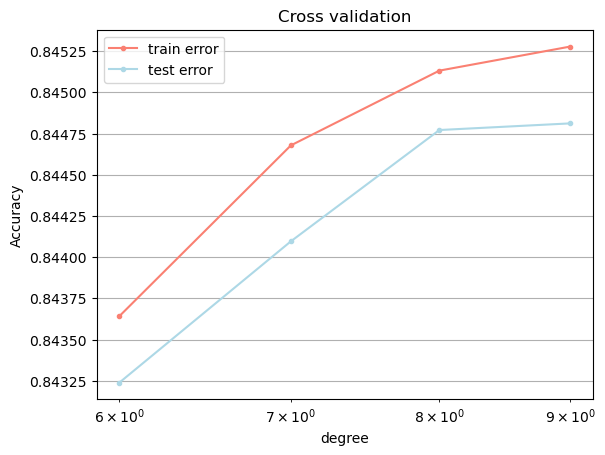

Best parameters
 {'degree': 9, 'fourier': 0} 

--> Test Accuracy for the best parameter :  0.8448119390944843

Test the fourier expansion
Tested parameters

- 1 th parameter tested :  {'degree': 9, 'fourier': 1} 

- 2 th parameter tested :  {'degree': 9, 'fourier': 2} 

- 3 th parameter tested :  {'degree': 9, 'fourier': 3} 

- 4 th parameter tested :  {'degree': 9, 'fourier': 4} 

- 5 th parameter tested :  {'degree': 9, 'fourier': 5} 

- 6 th parameter tested :  {'degree': 9, 'fourier': 6} 



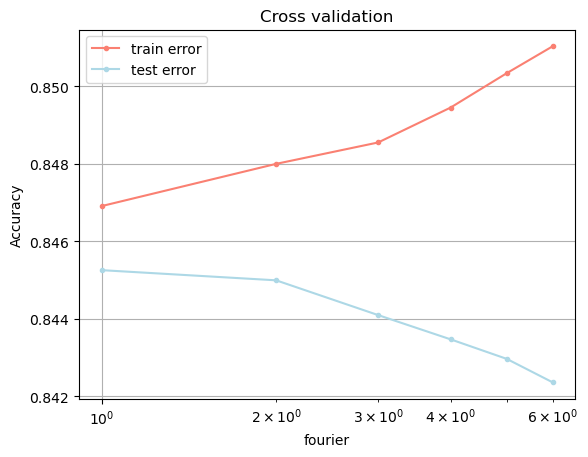

Best parameters
 {'degree': 9, 'fourier': 1} 

--> Test Accuracy for the best parameter :  0.8452556216597762

Ridge regression
Tested parameters

- 1 th parameter tested :  {'lambda_': 0.001, 'degree': 6, 'fourier': 0} 

- 2 th parameter tested :  {'lambda_': 0.001, 'degree': 7, 'fourier': 0} 

- 3 th parameter tested :  {'lambda_': 0.001, 'degree': 8, 'fourier': 0} 

- 4 th parameter tested :  {'lambda_': 0.001, 'degree': 9, 'fourier': 0} 



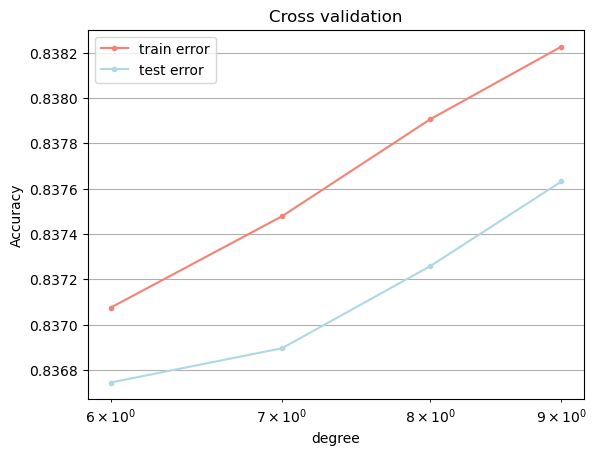

Best parameters
 {'lambda_': 0.001, 'degree': 9, 'fourier': 0}
--> Test Accuracy for the best parameter :  0.8376323484924877

Test the lambda expansion
Tested parameters

- 1 th parameter tested :  {'lambda_': 1e-08, 'degree': 9, 'fourier': 0} 

- 2 th parameter tested :  {'lambda_': 1.389495494373136e-07, 'degree': 9, 'fourier': 0} 

- 3 th parameter tested :  {'lambda_': 1.9306977288832498e-06, 'degree': 9, 'fourier': 0} 

- 4 th parameter tested :  {'lambda_': 2.6826957952797274e-05, 'degree': 9, 'fourier': 0} 

- 5 th parameter tested :  {'lambda_': 0.0003727593720314938, 'degree': 9, 'fourier': 0} 

- 6 th parameter tested :  {'lambda_': 0.005179474679231202, 'degree': 9, 'fourier': 0} 

- 7 th parameter tested :  {'lambda_': 0.07196856730011514, 'degree': 9, 'fourier': 0} 

- 8 th parameter tested :  {'lambda_': 1.0, 'degree': 9, 'fourier': 0} 



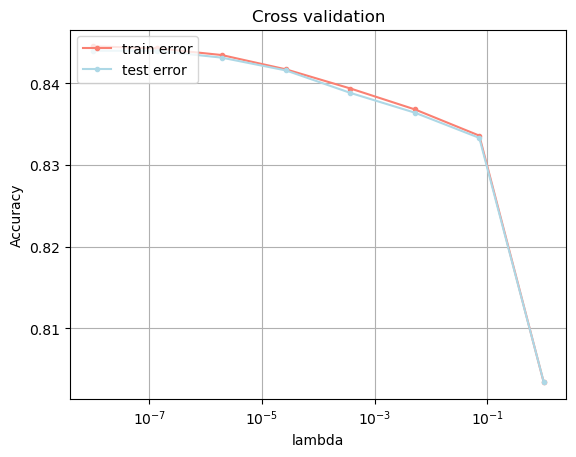

Best parameters
 {'lambda_': 1e-08, 'degree': 9, 'fourier': 0}
--> Test Accuracy for the best parameter :  0.8439850761318949

Test the fourier expansion
Tested parameters

- 1 th parameter tested :  {'lambda_': 1e-08, 'degree': 9, 'fourier': 0} 

- 2 th parameter tested :  {'lambda_': 1e-08, 'degree': 9, 'fourier': 1} 

- 3 th parameter tested :  {'lambda_': 1e-08, 'degree': 9, 'fourier': 2} 

- 4 th parameter tested :  {'lambda_': 1e-08, 'degree': 9, 'fourier': 3} 

- 5 th parameter tested :  {'lambda_': 1e-08, 'degree': 9, 'fourier': 4} 

- 6 th parameter tested :  {'lambda_': 1e-08, 'degree': 9, 'fourier': 5} 

- 7 th parameter tested :  {'lambda_': 1e-08, 'degree': 9, 'fourier': 6} 



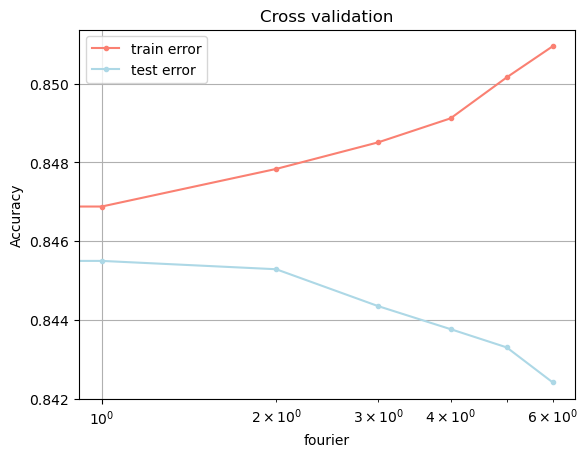

Best parameters
 {'lambda_': 1e-08, 'degree': 9, 'fourier': 1}
--> Test Accuracy for the best parameter :  0.8454976303317535


In [9]:
make_analysis_per_group(preprocessed_X['group_0'], preprocessed_y['group_0'])

# Group 1

Least squares
Test the high degrees
Tested parameters

- 1 th parameter tested :  {'degree': 6, 'fourier': 0} 

- 2 th parameter tested :  {'degree': 7, 'fourier': 0} 

- 3 th parameter tested :  {'degree': 8, 'fourier': 0} 

- 4 th parameter tested :  {'degree': 9, 'fourier': 0} 



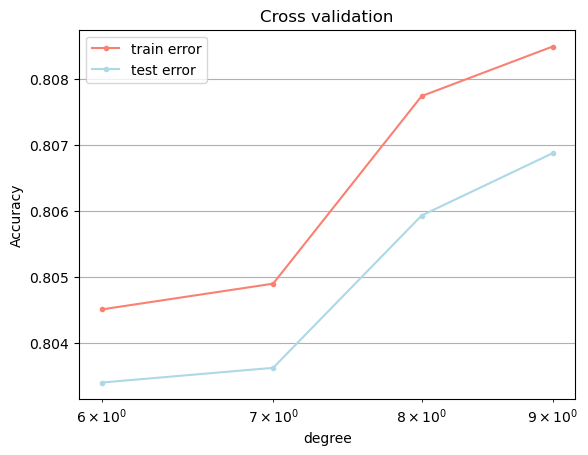

Best parameters
 {'degree': 9, 'fourier': 0} 

--> Test Accuracy for the best parameter :  0.8068735271013354

Test the fourier expansion
Tested parameters

- 1 th parameter tested :  {'degree': 9, 'fourier': 1} 

- 2 th parameter tested :  {'degree': 9, 'fourier': 2} 

- 3 th parameter tested :  {'degree': 9, 'fourier': 3} 

- 4 th parameter tested :  {'degree': 9, 'fourier': 4} 

- 5 th parameter tested :  {'degree': 9, 'fourier': 5} 

- 6 th parameter tested :  {'degree': 9, 'fourier': 6} 



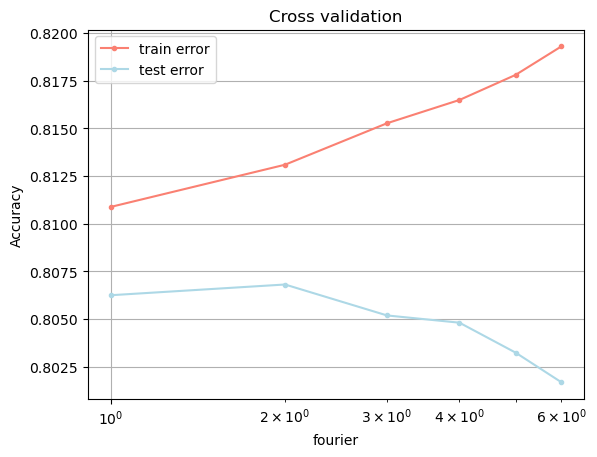

Best parameters
 {'degree': 9, 'fourier': 2} 

--> Test Accuracy for the best parameter :  0.8068080649384657

Ridge regression
Tested parameters

- 1 th parameter tested :  {'lambda_': 0.001, 'degree': 6, 'fourier': 0} 

- 2 th parameter tested :  {'lambda_': 0.001, 'degree': 7, 'fourier': 0} 

- 3 th parameter tested :  {'lambda_': 0.001, 'degree': 8, 'fourier': 0} 

- 4 th parameter tested :  {'lambda_': 0.001, 'degree': 9, 'fourier': 0} 



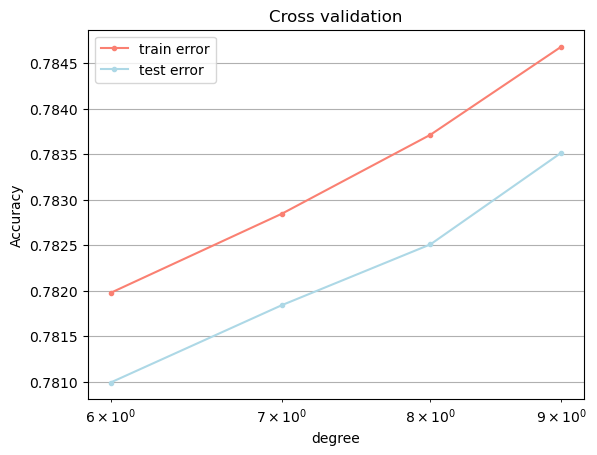

Best parameters
 {'lambda_': 0.001, 'degree': 9, 'fourier': 0}
--> Test Accuracy for the best parameter :  0.783516627389369

Test the lambda expansion
Tested parameters

- 1 th parameter tested :  {'lambda_': 1e-08, 'degree': 9, 'fourier': 0} 

- 2 th parameter tested :  {'lambda_': 1.389495494373136e-07, 'degree': 9, 'fourier': 0} 

- 3 th parameter tested :  {'lambda_': 1.9306977288832498e-06, 'degree': 9, 'fourier': 0} 

- 4 th parameter tested :  {'lambda_': 2.6826957952797274e-05, 'degree': 9, 'fourier': 0} 

- 5 th parameter tested :  {'lambda_': 0.0003727593720314938, 'degree': 9, 'fourier': 0} 

- 6 th parameter tested :  {'lambda_': 0.005179474679231202, 'degree': 9, 'fourier': 0} 

- 7 th parameter tested :  {'lambda_': 0.07196856730011514, 'degree': 9, 'fourier': 0} 

- 8 th parameter tested :  {'lambda_': 1.0, 'degree': 9, 'fourier': 0} 



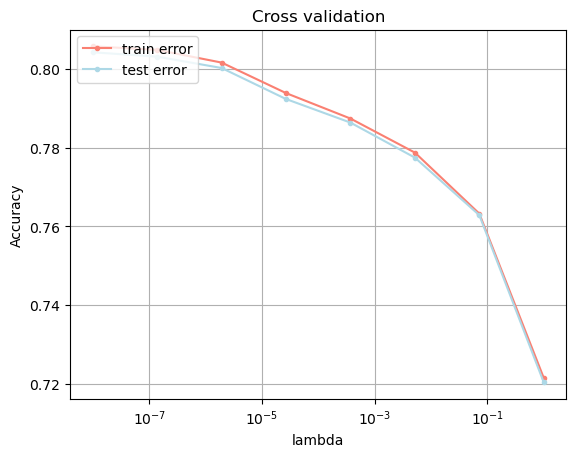

Best parameters
 {'lambda_': 1e-08, 'degree': 9, 'fourier': 0}
--> Test Accuracy for the best parameter :  0.8042026708562451

Test the fourier expansion
Tested parameters

- 1 th parameter tested :  {'lambda_': 1e-08, 'degree': 9, 'fourier': 0} 

- 2 th parameter tested :  {'lambda_': 1e-08, 'degree': 9, 'fourier': 1} 

- 3 th parameter tested :  {'lambda_': 1e-08, 'degree': 9, 'fourier': 2} 

- 4 th parameter tested :  {'lambda_': 1e-08, 'degree': 9, 'fourier': 3} 

- 5 th parameter tested :  {'lambda_': 1e-08, 'degree': 9, 'fourier': 4} 

- 6 th parameter tested :  {'lambda_': 1e-08, 'degree': 9, 'fourier': 5} 

- 7 th parameter tested :  {'lambda_': 1e-08, 'degree': 9, 'fourier': 6} 



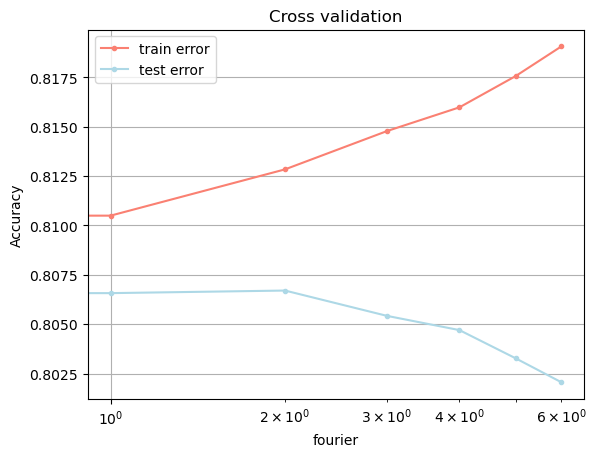

Best parameters
 {'lambda_': 1e-08, 'degree': 9, 'fourier': 2}
--> Test Accuracy for the best parameter :  0.8067033254778737


In [10]:
make_analysis_per_group(preprocessed_X['group_1'], preprocessed_y['group_1'])

# Group 2

Least squares
Test the high degrees
Tested parameters

- 1 th parameter tested :  {'degree': 6, 'fourier': 0} 

- 2 th parameter tested :  {'degree': 7, 'fourier': 0} 

- 3 th parameter tested :  {'degree': 8, 'fourier': 0} 

- 4 th parameter tested :  {'degree': 9, 'fourier': 0} 



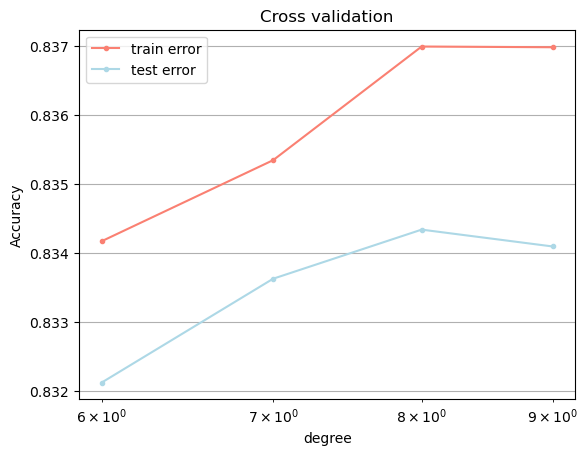

Best parameters
 {'degree': 8, 'fourier': 0} 

--> Test Accuracy for the best parameter :  0.8343426132899816

Test the fourier expansion
Tested parameters

- 1 th parameter tested :  {'degree': 8, 'fourier': 1} 

- 2 th parameter tested :  {'degree': 8, 'fourier': 2} 

- 3 th parameter tested :  {'degree': 8, 'fourier': 3} 

- 4 th parameter tested :  {'degree': 8, 'fourier': 4} 

- 5 th parameter tested :  {'degree': 8, 'fourier': 5} 

- 6 th parameter tested :  {'degree': 8, 'fourier': 6} 



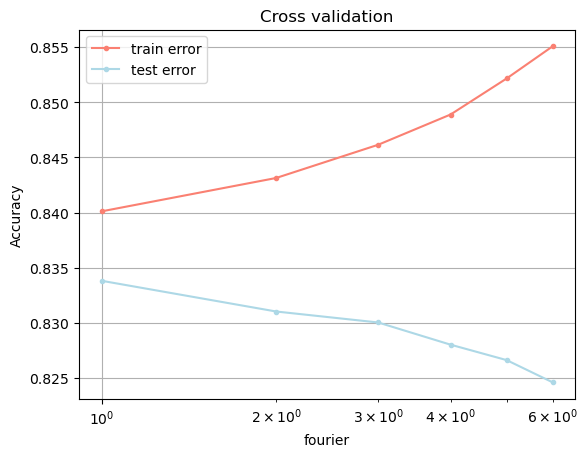

Best parameters
 {'degree': 8, 'fourier': 1} 

--> Test Accuracy for the best parameter :  0.8338142653932128

Ridge regression
Tested parameters

- 1 th parameter tested :  {'lambda_': 0.001, 'degree': 6, 'fourier': 0} 

- 2 th parameter tested :  {'lambda_': 0.001, 'degree': 7, 'fourier': 0} 

- 3 th parameter tested :  {'lambda_': 0.001, 'degree': 8, 'fourier': 0} 

- 4 th parameter tested :  {'lambda_': 0.001, 'degree': 9, 'fourier': 0} 



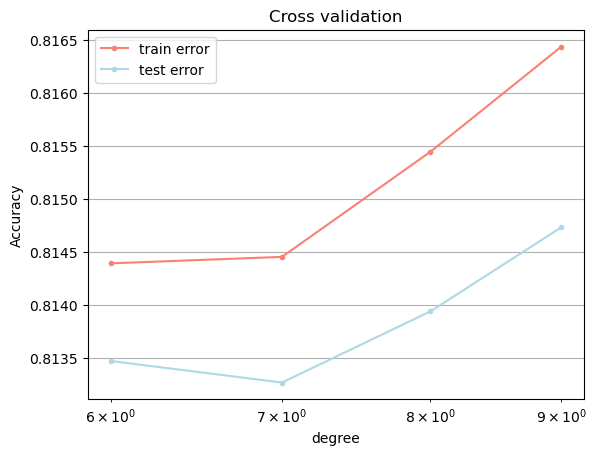

Best parameters
 {'lambda_': 0.001, 'degree': 9, 'fourier': 0}
--> Test Accuracy for the best parameter :  0.8147327778906727

Test the lambda expansion
Tested parameters

- 1 th parameter tested :  {'lambda_': 1e-08, 'degree': 9, 'fourier': 0} 

- 2 th parameter tested :  {'lambda_': 1.389495494373136e-07, 'degree': 9, 'fourier': 0} 

- 3 th parameter tested :  {'lambda_': 1.9306977288832498e-06, 'degree': 9, 'fourier': 0} 

- 4 th parameter tested :  {'lambda_': 2.6826957952797274e-05, 'degree': 9, 'fourier': 0} 

- 5 th parameter tested :  {'lambda_': 0.0003727593720314938, 'degree': 9, 'fourier': 0} 

- 6 th parameter tested :  {'lambda_': 0.005179474679231202, 'degree': 9, 'fourier': 0} 

- 7 th parameter tested :  {'lambda_': 0.07196856730011514, 'degree': 9, 'fourier': 0} 

- 8 th parameter tested :  {'lambda_': 1.0, 'degree': 9, 'fourier': 0} 



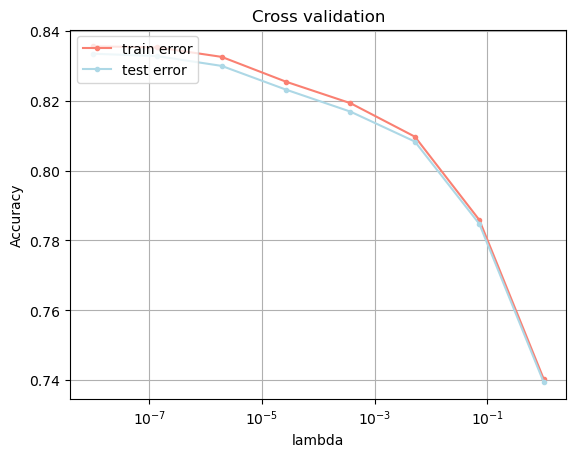

Best parameters
 {'lambda_': 1e-08, 'degree': 9, 'fourier': 0}
--> Test Accuracy for the best parameter :  0.8334891282259702

Test the fourier expansion
Tested parameters

- 1 th parameter tested :  {'lambda_': 1e-08, 'degree': 9, 'fourier': 0} 

- 2 th parameter tested :  {'lambda_': 1e-08, 'degree': 9, 'fourier': 1} 

- 3 th parameter tested :  {'lambda_': 1e-08, 'degree': 9, 'fourier': 2} 

- 4 th parameter tested :  {'lambda_': 1e-08, 'degree': 9, 'fourier': 3} 

- 5 th parameter tested :  {'lambda_': 1e-08, 'degree': 9, 'fourier': 4} 

- 6 th parameter tested :  {'lambda_': 1e-08, 'degree': 9, 'fourier': 5} 

- 7 th parameter tested :  {'lambda_': 1e-08, 'degree': 9, 'fourier': 6} 



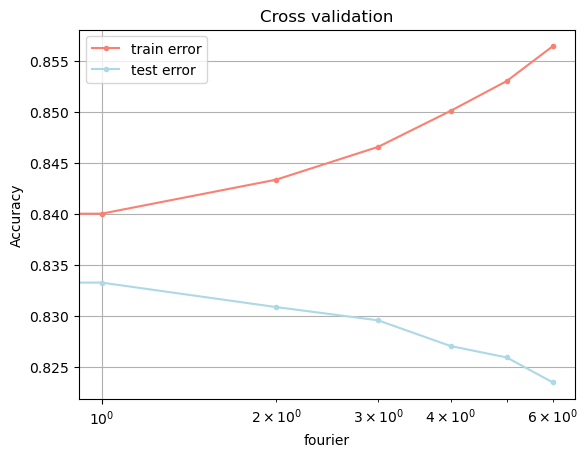

Best parameters
 {'lambda_': 1e-08, 'degree': 9, 'fourier': 0}
--> Test Accuracy for the best parameter :  0.8334891282259702


In [11]:
make_analysis_per_group(preprocessed_X['group_2'], preprocessed_y['group_2'])

# Group 3

Least squares
Test the high degrees
Tested parameters

- 1 th parameter tested :  {'degree': 6, 'fourier': 0} 

- 2 th parameter tested :  {'degree': 7, 'fourier': 0} 

- 3 th parameter tested :  {'degree': 8, 'fourier': 0} 

- 4 th parameter tested :  {'degree': 9, 'fourier': 0} 



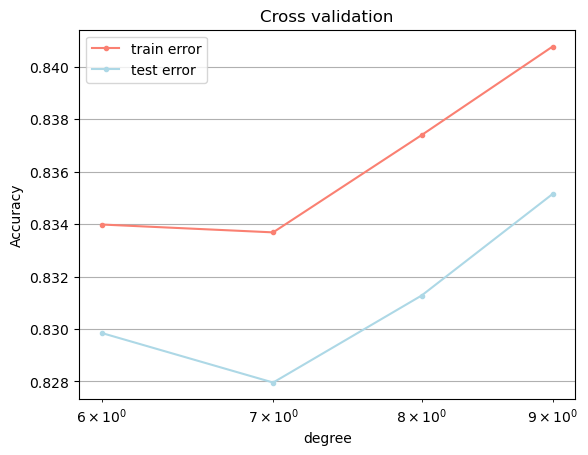

Best parameters
 {'degree': 9, 'fourier': 0} 

--> Test Accuracy for the best parameter :  0.8351450944265316

Test the fourier expansion
Tested parameters

- 1 th parameter tested :  {'degree': 9, 'fourier': 1} 

- 2 th parameter tested :  {'degree': 9, 'fourier': 2} 

- 3 th parameter tested :  {'degree': 9, 'fourier': 3} 

- 4 th parameter tested :  {'degree': 9, 'fourier': 4} 

- 5 th parameter tested :  {'degree': 9, 'fourier': 5} 

- 6 th parameter tested :  {'degree': 9, 'fourier': 6} 



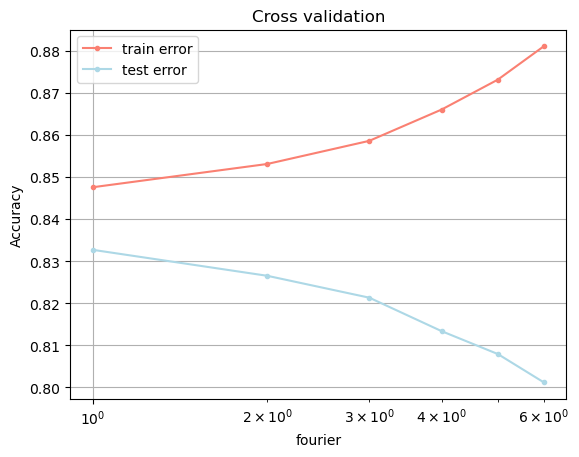

Best parameters
 {'degree': 9, 'fourier': 1} 

--> Test Accuracy for the best parameter :  0.8327038231229847

Ridge regression
Tested parameters

- 1 th parameter tested :  {'lambda_': 0.001, 'degree': 6, 'fourier': 0} 

- 2 th parameter tested :  {'lambda_': 0.001, 'degree': 7, 'fourier': 0} 

- 3 th parameter tested :  {'lambda_': 0.001, 'degree': 8, 'fourier': 0} 

- 4 th parameter tested :  {'lambda_': 0.001, 'degree': 9, 'fourier': 0} 



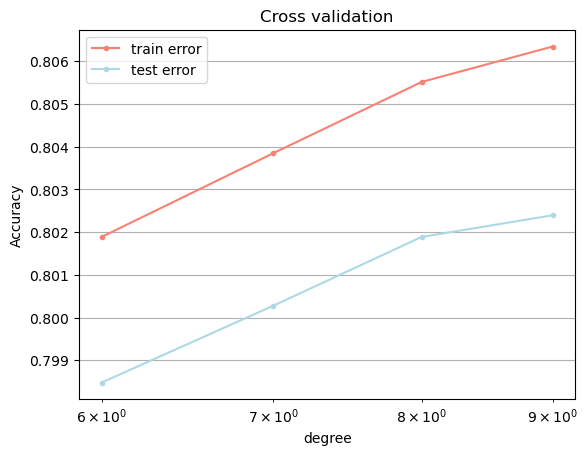

Best parameters
 {'lambda_': 0.001, 'degree': 9, 'fourier': 0}
--> Test Accuracy for the best parameter :  0.8023952095808383

Test the lambda expansion
Tested parameters

- 1 th parameter tested :  {'lambda_': 1e-08, 'degree': 9, 'fourier': 0} 

- 2 th parameter tested :  {'lambda_': 1.389495494373136e-07, 'degree': 9, 'fourier': 0} 

- 3 th parameter tested :  {'lambda_': 1.9306977288832498e-06, 'degree': 9, 'fourier': 0} 

- 4 th parameter tested :  {'lambda_': 2.6826957952797274e-05, 'degree': 9, 'fourier': 0} 

- 5 th parameter tested :  {'lambda_': 0.0003727593720314938, 'degree': 9, 'fourier': 0} 

- 6 th parameter tested :  {'lambda_': 0.005179474679231202, 'degree': 9, 'fourier': 0} 

- 7 th parameter tested :  {'lambda_': 0.07196856730011514, 'degree': 9, 'fourier': 0} 

- 8 th parameter tested :  {'lambda_': 1.0, 'degree': 9, 'fourier': 0} 



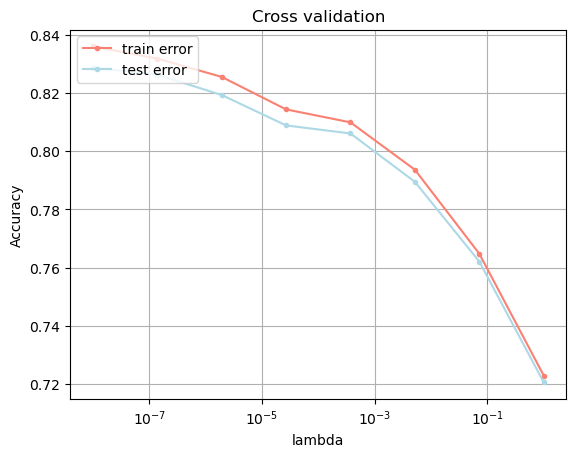

Best parameters
 {'lambda_': 1e-08, 'degree': 9, 'fourier': 0}
--> Test Accuracy for the best parameter :  0.8286964532473515

Test the fourier expansion
Tested parameters

- 1 th parameter tested :  {'lambda_': 1e-08, 'degree': 9, 'fourier': 0} 

- 2 th parameter tested :  {'lambda_': 1e-08, 'degree': 9, 'fourier': 1} 

- 3 th parameter tested :  {'lambda_': 1e-08, 'degree': 9, 'fourier': 2} 

- 4 th parameter tested :  {'lambda_': 1e-08, 'degree': 9, 'fourier': 3} 

- 5 th parameter tested :  {'lambda_': 1e-08, 'degree': 9, 'fourier': 4} 

- 6 th parameter tested :  {'lambda_': 1e-08, 'degree': 9, 'fourier': 5} 

- 7 th parameter tested :  {'lambda_': 1e-08, 'degree': 9, 'fourier': 6} 



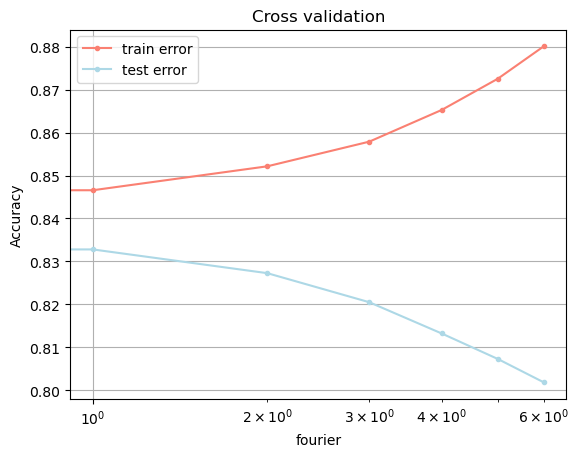

Best parameters
 {'lambda_': 1e-08, 'degree': 9, 'fourier': 1}
--> Test Accuracy for the best parameter :  0.8327959465684016


In [12]:
make_analysis_per_group(preprocessed_X['group_3'], preprocessed_y['group_3'])